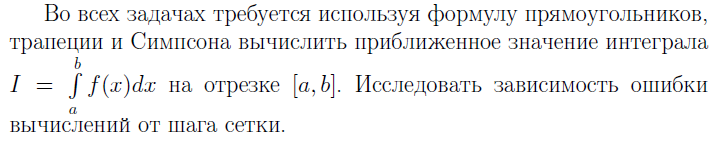

Реализовать функции `int_rect(N)`, `int_trap(N)`, `int_simp(N)`, построить графики зависимости среднеквадр. откл. от $ h = (b - a)/N $ итегралов, посчитанного каждым из способов, на

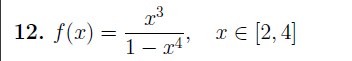

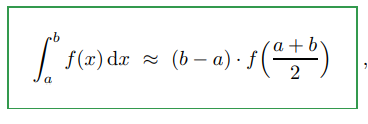

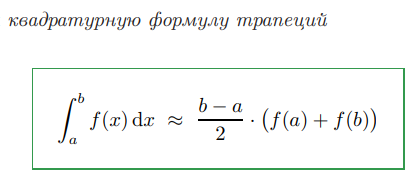

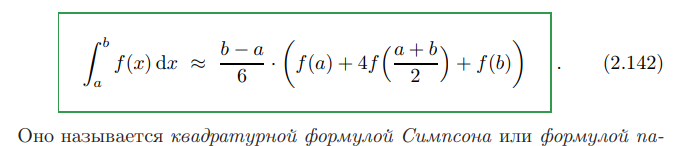

Введите N = 50
Аналитически: -0.7083033360140539

По формуле прямоугольников: -0.7141036817504381
Относительная погрешность: 0.008189070192758668

По формуле трапеции: -0.7083413768284694
Относительная погрешность: 5.370695361900943e-05

По формуле Симпсона: -0.7083033374179327
Относительная погрешность: 1.9820304657826638e-09


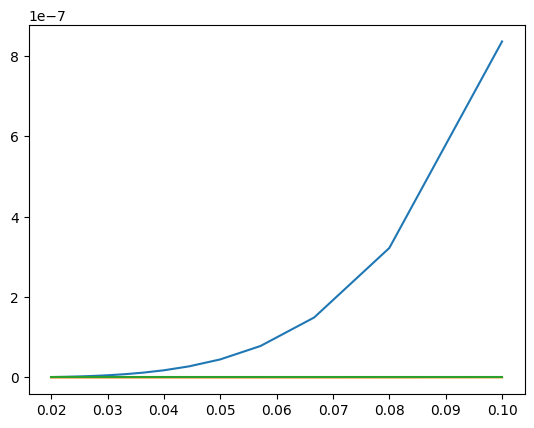

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**3 / (1 - x**4)

def F(x):
    return -1/4 * np.log(abs(1-x**4))

def int_rect(N, x_i):
    integral = 0
    error = 0
    for i in range(N-1):
        # m = (x_i[i+1] - x_i[i]) * f((x_i[i+1] + x_i[i]) / 2)
        m = (x_i[i+1] - x_i[i]) * f(x_i[i])
        integral += m
        error += (F(x_i[i+1]) - F(x_i[i]) - m)**2
    error /= (N-2)
    return integral, error

def int_trap(N, x_i):
    integral = 0
    error = 0
    for i in range(N-1):
        m = ((x_i[i+1] - x_i[i]) / 2) * (f(x_i[i+1]) + f(x_i[i]))
        integral += m
        error += (F(x_i[i+1]) - F(x_i[i]) - m)**2
    error /= (N-2)
    return integral, error

def int_simp(N, x_i):
    integral = 0
    error = 0
    for i in range(N-1):
        m = ((x_i[i+1] - x_i[i]) / 6) * (f(x_i[i+1]) + f(x_i[i]) + 4*f((x_i[i+1] + x_i[i]) / 2))
        integral += m
        error += (F(x_i[i+1]) - F(x_i[i]) - m)**2
    error /= (N-2)
    return integral, error

a = 2
b = 4
N = int(input('Введите N = '))
x_i = np.linspace(a, b, N)
print('Аналитически:', F(b) - F(a), end='\n'*2)
print('По формуле прямоугольников:', int_rect(N, x_i)[0])
print('Относительная погрешность:', abs(( int_rect(N, x_i)[0] - (F(b) - F(a)))/(F(b) - F(a))), end='\n'*2)
print('По формуле трапеции:', int_trap(N, x_i)[0])
print('Относительная погрешность:', abs(( int_trap(N, x_i)[0] - (F(b) - F(a)))/(F(b) - F(a))), end='\n'*2)
print('По формуле Симпсона:', int_simp(N, x_i)[0])
print('Относительная погрешность:', abs(( int_simp(N, x_i)[0] - (F(b) - F(a)))/(F(b) - F(a))))

error_r = []
error_t = []
error_s = []
h = []
for N in range(20, 101, 5):
    x_i = np.linspace(a, b, N)
    error_r.append(int_rect(N, x_i)[1])
    error_t.append(int_trap(N, x_i)[1])
    error_s.append(int_simp(N, x_i)[1])
    h.append((b-a)/N)

plt.plot(h, error_r)
plt.plot(h, error_t)
plt.plot(h, error_s)
plt.show()